# (baseline development) Silicon per M2 Calculations

This journal documents the methods and assumptions made to create a baseline material file for silicon.

## Mass per M2

The mass of silicon contained in a PV module is dependent on the size, thickness and number of cells in an average module. Since there is a range of sizes and number of cells per module, we will attempt a weighted average. These weighted averages are based on ITRPV data, which goes back to 2010, Fraunhofer data back to 1990, and 

In [13]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

density_si = 2.3290 #g/cm^3 from Wikipedia of Silicon (https://en.wikipedia.org/wiki/Silicon) 
#it might be better to have mono-Si and multi-Si densities, including dopants, 
#but that density is not readily available

A Fraunhofer report indicates that in 1990, wafers were 400 micron thick, decreasing to the more modern 180 micron thickness by 2008. ITRPVs back to 2010 indicate that 156 mm x 156mm was the standard size wafer through 2015.

In [14]:
#now lets try to do this for 2019 through 2030 all at once with dataframes
#taking the average of the ranges specified in ITRPVs

#first we input the market share data for mcSi and monoSi, read in from csv
cwd = os.getcwd() #grabs current working directory
skipcols=['Source','Notes','Note']
mrktshr_cellsize = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/MarketShare_CellSize.csv",
                               index_col='Year', usecols=lambda x: x not in skipcols)
mrktshr_cellsize /=100 #turn whole numbers into decimal percentages
#print(mrktshr_cellsize)

#then split them into two dataframes for later computations
dfmarketshare_mcSi = mrktshr_cellsize.filter(regex = 'mcSi')
dfmarketshare_monoSi = mrktshr_cellsize.filter(regex = 'monoSi')

print(dfmarketshare_mcSi)
print(dfmarketshare_monoSi)

      mcSi_156mm  mcSi_156.75mm  mcSi_158.75mm  mcSi_161.75mm  mcSi_166mm  \
Year                                                                        
1995         NaN            NaN            NaN            NaN         NaN   
1996         NaN            NaN            NaN            NaN         NaN   
1997         NaN            NaN            NaN            NaN         NaN   
1998         NaN            NaN            NaN            NaN         NaN   
1999         NaN            NaN            NaN            NaN         NaN   
2000         NaN            NaN            NaN            NaN         NaN   
2001         NaN            NaN            NaN            NaN         NaN   
2002         NaN            NaN            NaN            NaN         NaN   
2003         NaN            NaN            NaN            NaN         NaN   
2004         NaN            NaN            NaN            NaN         NaN   
2005         NaN            NaN            NaN            NaN         NaN   

Interpolate marketshare for missing years in ITRPV 2020 predictions
----
choosing to interpolate market share of different sizes rather than cell size because this should be more basedin technology - i.e. crystals only grow certain sizes. Additionally, it is more helpful to understand the impact silicon usage by keeping cell size and marketshare seperate.

In [15]:
#interpolate for missing marketshare data
##the interpolate function returns a view of the df, doesn't modify the df itself
##therefore you have to set the old df, or a new one = the df.interpolate function
dfmarketshare_mcSi=dfmarketshare_mcSi.interpolate(method='linear',axis=0,limit=2,limit_area='inside')
dfmarketshare_monoSi=dfmarketshare_monoSi.interpolate(method='linear',axis=0,limit=2,limit_area='inside')

#fill remaining NaN/outside with 0 (i.e., no market share)
dfmarketshare_mcSi=dfmarketshare_mcSi.fillna(0.0)
dfmarketshare_monoSi=dfmarketshare_monoSi.fillna(0.0)

print(dfmarketshare_mcSi)
print(dfmarketshare_monoSi)

      mcSi_156mm  mcSi_156.75mm  mcSi_158.75mm  mcSi_161.75mm  mcSi_166mm  \
Year                                                                        
1995        0.00           0.00           0.00           0.00        0.00   
1996        0.00           0.00           0.00           0.00        0.00   
1997        0.00           0.00           0.00           0.00        0.00   
1998        0.00           0.00           0.00           0.00        0.00   
1999        0.00           0.00           0.00           0.00        0.00   
2000        0.00           0.00           0.00           0.00        0.00   
2001        0.00           0.00           0.00           0.00        0.00   
2002        0.00           0.00           0.00           0.00        0.00   
2003        0.00           0.00           0.00           0.00        0.00   
2004        0.00           0.00           0.00           0.00        0.00   
2005        0.00           0.00           0.00           0.00        0.00   

In [20]:
#multiply each marketshare dataframe column by it's respective size
#dfmarketshare_mcSi.share156 *=156 #this is a slow way to multiply each column by its respective size

mcSi_cellsizes = {'mcSi_156mm':156,
            'mcSi_156.75mm':156.75,
            'mcSi_158.75mm':157.75,
            'mcSi_161.75mm':163.875,
            'mcSi_166mm':166,
            'mcSi_182mm':182,
            'mcSi_182mmup':210} #dictionary cell dimensions for mc-Si cells

monoSi_cellsizes = {'monoSi_156mm':156,
                   'monoSi_156.75mm':156.75,
                   'monoSi_158.75mm':158.75,
                   'monoSi_161.7mm':161.7,
                   'monoSi_166mm':166,
                   'monoSi_182mm':182,
                   'monoSi_210mm':210}

#multiply cell dimensions by their market share to get a weighted average
##this is where the column names needed to match
df_scalecell_mcSi = dfmarketshare_mcSi.mul(mcSi_cellsizes,'columns')
df_scalecell_monoSi = dfmarketshare_monoSi.mul(monoSi_cellsizes,'columns')

print(df_scalecell_mcSi)
print(df_scalecell_monoSi)

      mcSi_156mm  mcSi_156.75mm  mcSi_158.75mm  mcSi_161.75mm  mcSi_166mm  \
Year                                                                        
1995        0.00         0.0000          0.000         0.0000        0.00   
1996        0.00         0.0000          0.000         0.0000        0.00   
1997        0.00         0.0000          0.000         0.0000        0.00   
1998        0.00         0.0000          0.000         0.0000        0.00   
1999        0.00         0.0000          0.000         0.0000        0.00   
2000        0.00         0.0000          0.000         0.0000        0.00   
2001        0.00         0.0000          0.000         0.0000        0.00   
2002        0.00         0.0000          0.000         0.0000        0.00   
2003        0.00         0.0000          0.000         0.0000        0.00   
2004        0.00         0.0000          0.000         0.0000        0.00   
2005        0.00         0.0000          0.000         0.0000        0.00   

In [21]:
#now add the columns together to get the weighted average cell size for each year for each technology
df_avgcell_mcSi = pd.DataFrame(df_scalecell_mcSi.agg("sum", axis="columns"))
df_avgcell_monoSi = pd.DataFrame(df_scalecell_monoSi.agg("sum", axis="columns")) #agg functions return a series not a dictionary
#print(df_avgcell_mcSi)

#join the two dataframes into single one with two columns
df_avgcell = pd.concat([df_avgcell_monoSi,df_avgcell_mcSi], axis=1) #concatinate on the columns axis
df_avgcell.columns = ['monoSi','mcSi'] #name the columns
print(df_avgcell)


         monoSi      mcSi
Year                     
1995    0.00000    0.0000
1996    0.00000    0.0000
1997    0.00000    0.0000
1998    0.00000    0.0000
1999    0.00000    0.0000
2000    0.00000    0.0000
2001    0.00000    0.0000
2002    0.00000    0.0000
2003    0.00000    0.0000
2004    0.00000    0.0000
2005    0.00000    0.0000
2006    0.00000    0.0000
2007    0.00000    0.0000
2008    0.00000    0.0000
2009    0.00000    0.0000
2010  156.00000  156.0000
2011  156.00000  156.0000
2012  156.00000  156.0000
2013  156.00000  156.0000
2014  156.00000  156.0000
2015  156.00000  156.0000
2016  156.33750  156.0750
2017  156.64200  156.4725
2018  156.78900  156.6750
2019  157.93100  157.4600
2020  165.71550  162.5600
2021  174.75250    0.0000
2022  179.09700    0.0000
2023  181.92275    0.0000
2024  184.74850    0.0000
2025  187.41425    0.0000
2026  190.08000    0.0000
2027  190.96000    0.0000
2028  191.84000    0.0000
2029  192.72000    0.0000
2030  194.28000    0.0000
2031  195.84

However, we know that it wasn't 156 mm back to 1995, but exact records of average cell size are lacking. A mention of a companies' new manufacturing line producing 125 mm mono-Si in 1993 can be found in IEA PVPS documentation, and Martin Green 2000 calls out 100 mm to 150 mm manufacturing. SinoVoltaics "History of Wafer Sizes" claims 100 mm x 100mm was standard through 1996, then 125 mm x 125mm took over, followed by 156 mm (start date not specified), with 156.75mm starting in 2016. A 2020 Trina solar presentation claims 100 mm x 100 mm in 1995, and only increases to 125mm in 2005, with 156mm taking over in ~2010 (which generally agrees with ITRPVs). 

WoodMackenzie Reports indicate that 1981 through 2012, 125mm was the dominant size, 2013-2016 was 156mm and 156.75mm, 2017-2018 had many sizes between 158.75mm and 161.75mm, and finally 2019 saw the introduction of 166m, 182mm and 210mm (Sun, Solar PV Module Technology Report 2020). The report data notes that these are "shipment" or manufacturing data, and the installed capacity will lag by 3 to 18 months. Finally, the report predicts that 182mm or 210mm will become dominant shipped technology by 2023. This timeline is ahead of what the ITRPVs predict, though may align when accounting for the 3 to 18 month lag.

Based on these sources, we will say that cell sizes in 1995 were 100 mm, and in 2000 were 125 mm, and 156mm in 2010 (where ITRPV data starts). These will be step functions instead of linear interpolations to attempt to better represent that most size changes requires a replacement of the manufacturing line equipment. In reality, there would be some marketshare blending, which could be added with improved future data finding.

In [22]:
#turn zeros back into NaN
df_avgcell.replace(0.0, np.NaN, inplace=True)

#write over 1995 and 2000 data
#df_avgcell['monoSi'][1995]=100.00
#df_avgcell['monoSi'][2000]=125.00
#df_avgcell['mcSi'][1995]=100.00
#df_avgcell['mcSi'][2000]=125.00

#set dates for start and end of cell size changes
start_100 = 1995
end_100 = 1999
start_125 = 2000
end_125 = 2009

df_avgcell.loc[start_100:end_100] = 100.00
df_avgcell.loc[start_125:end_125] = 125.00

print(df_avgcell)

         monoSi      mcSi
Year                     
1995  100.00000  100.0000
1996  100.00000  100.0000
1997  100.00000  100.0000
1998  100.00000  100.0000
1999  100.00000  100.0000
2000  125.00000  125.0000
2001  125.00000  125.0000
2002  125.00000  125.0000
2003  125.00000  125.0000
2004  125.00000  125.0000
2005  125.00000  125.0000
2006  125.00000  125.0000
2007  125.00000  125.0000
2008  125.00000  125.0000
2009  125.00000  125.0000
2010  156.00000  156.0000
2011  156.00000  156.0000
2012  156.00000  156.0000
2013  156.00000  156.0000
2014  156.00000  156.0000
2015  156.00000  156.0000
2016  156.33750  156.0750
2017  156.64200  156.4725
2018  156.78900  156.6750
2019  157.93100  157.4600
2020  165.71550  162.5600
2021  174.75250       NaN
2022  179.09700       NaN
2023  181.92275       NaN
2024  184.74850       NaN
2025  187.41425       NaN
2026  190.08000       NaN
2027  190.96000       NaN
2028  191.84000       NaN
2029  192.72000       NaN
2030  194.28000       NaN
2031  195.84

Now we have an average cell dimension for mc-Si and mono-Si for 1995 through 2030. 

## Marketshare Data Manipulation

Next, we apply the marketshare of mc-Si vs mono-Si to get the average cell dimension for the year. Market share of mc-Si vs mono-Si is taken from LBNL "Tracking the Sun" report (warning: this is non-utility scale data i.e. <5MW, and is from 2002-2018), from Mints 2019 SPV report, from ITRPVs, and old papers (Costello & Rappaport 1980, Maycock 2003 & 2005).

In [46]:
#read in a csv that was copied from CE Data google sheet
cwd = os.getcwd() #grabs current working directory
techmarketshare = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/ModuleType_MarketShare.csv",index_col='Year')
#this file path navigates from current working directory back up 2 folders, and over to the csv
techmarketshare /=100 #turn whole numbers into decimal percentages
print(techmarketshare)

      monoSi_LBNL  mcSi_LBNL  otherSi_LBNL  monoSi_Mints  mcSi_Mints  \
Year                                                                   
1980          NaN        NaN           NaN           NaN         NaN   
1981          NaN        NaN           NaN           NaN         NaN   
1982          NaN        NaN           NaN           NaN         NaN   
1983          NaN        NaN           NaN           NaN         NaN   
1984          NaN        NaN           NaN           NaN         NaN   
1985          NaN        NaN           NaN           NaN         NaN   
1986          NaN        NaN           NaN           NaN         NaN   
1987          NaN        NaN           NaN           NaN         NaN   
1988          NaN        NaN           NaN           NaN         NaN   
1989          NaN        NaN           NaN           NaN         NaN   
1990          NaN        NaN           NaN           NaN         NaN   
1991          NaN        NaN           NaN           NaN        

#### create a harmonization of annual market share, and interpolate

In [47]:
# first, create a single value of tech market share in each year or NaN
#split mcSi and monoSi
mcSi_cols = techmarketshare.filter(regex = 'mcSi')
monoSi_cols = techmarketshare.filter(regex = 'mono')

#show where the data is coming from graphically
#plt.plot(mcSi_cols,'.')
monoSikeys = monoSi_cols.columns
labelnames = [e[7:] for e in monoSikeys] #e is a random variable to iterate through the elements of the array
mcSikeys = mcSi_cols.columns
labelnames_mcSi = [e[5:] for e in mcSikeys]
#print(monoSikeys)

Text(0, 0.5, 'Market Share of Mono-Si [%]')

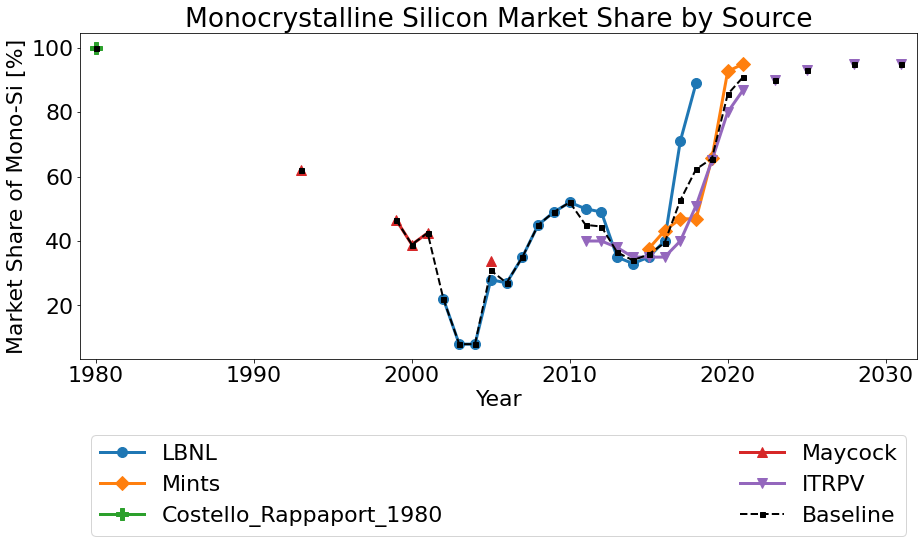

In [48]:
#aggregate all the columns of mono or mcSi into one averaged market share
est_mktshr_mcSi = pd.DataFrame(mcSi_cols.agg("mean", axis="columns"))
#print(est_mktshr_mcSi)
est_mktshr_monoSi = pd.DataFrame(monoSi_cols.agg("mean", axis="columns"))
#print(est_mktshr_monoSi)

#Join the monoSi and mcSi back together as a dataframe
est_mrktshrs = pd.concat([est_mktshr_monoSi,est_mktshr_mcSi], axis=1) #concatinate on the columns axis
est_mrktshrs.columns = ['monoSi','mcSi'] #name the columns

#plot individuals AND average aggregate
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(monoSi_cols.index,monoSi_cols[monoSikeys[0]]*100,lw=3,marker='o', ms=10,label=labelnames[0])
plt.plot(monoSi_cols.index,monoSi_cols[monoSikeys[1]]*100,lw=3,marker='D',ms=10,label=labelnames[1])
plt.plot(monoSi_cols.index,monoSi_cols[monoSikeys[2]]*100,lw=3,marker='P',ms=12,label=labelnames[2])
plt.plot(monoSi_cols.index,monoSi_cols[monoSikeys[3]]*100,lw=3,marker='^',ms=10,label=labelnames[3])
plt.plot(monoSi_cols.index,monoSi_cols[monoSikeys[4]]*100,lw=3,marker='v',ms=10,label=labelnames[4])
plt.plot(est_mrktshrs.index,est_mrktshrs['monoSi']*100,'--k',lw=2, marker='s',ms=5, label='Baseline')
plt.legend(bbox_to_anchor=(0, -0.2, 1, 0), loc=2, mode="expand", ncol=2)
plt.xlim([1979,2032])
plt.title('Monocrystalline Silicon Market Share by Source')
plt.xlabel('Year')
plt.ylabel('Market Share of Mono-Si [%]')

Text(0, 0.5, 'Market Share (%)')

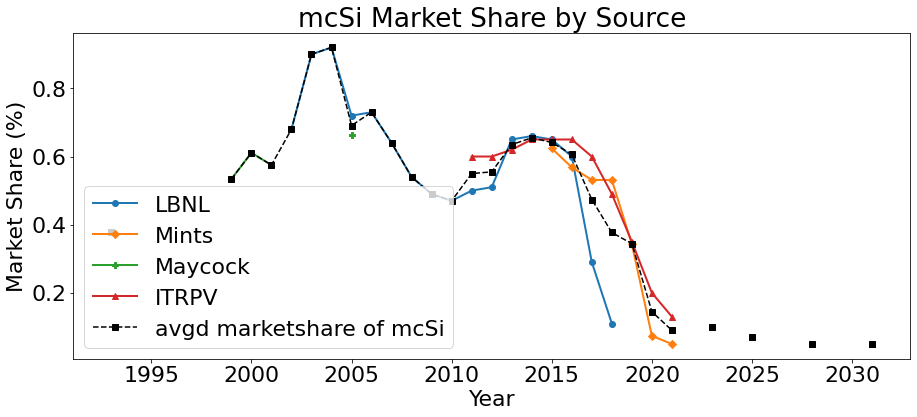

In [49]:
plt.plot(mcSi_cols.index,mcSi_cols[mcSikeys[0]],lw=2,marker='o',label=labelnames_mcSi[0])
plt.plot(mcSi_cols.index,mcSi_cols[mcSikeys[1]],lw=2,marker='D',label=labelnames_mcSi[1])
plt.plot(mcSi_cols.index,mcSi_cols[mcSikeys[2]],lw=2,marker='P',label=labelnames_mcSi[2])
plt.plot(mcSi_cols.index,mcSi_cols[mcSikeys[3]],lw=2,marker='^',label=labelnames_mcSi[3])
plt.plot(est_mrktshrs.index,est_mrktshrs['mcSi'],'--k', marker='s',label='avgd marketshare of mcSi')
plt.legend()
plt.title('mcSi Market Share by Source')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')

### Interpolate and Normalize

Text(0, 0.5, 'Market Share (%)')

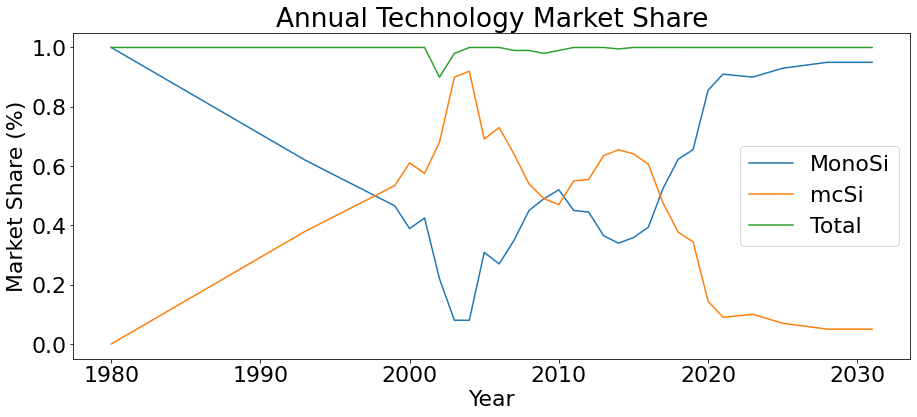

In [50]:
#Interpolate for marketshare NaN values
est_mrktshrs['mcSi'][1980]=0.0
est_mrktshrs = est_mrktshrs.interpolate(method='linear',axis=0,limit_area='inside')

#sanity check of market share data - does it add up?
est_mrktshrs['Total'] = est_mrktshrs.monoSi+est_mrktshrs.mcSi
plt.plot(est_mrktshrs['monoSi'], label='MonoSi')
plt.plot(est_mrktshrs['mcSi'], label='mcSi')
plt.plot(est_mrktshrs['Total'],label='Total')
plt.legend()
plt.title('Annual Technology Market Share')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
#print(est_mrktshrs)
#Warning: 2002, 10% of the silicon marketshare was "other", including amorphous, etc.
#del est_mrktshrs['Total']

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_18600\3533824881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_marketshares['Total'] = scaled_marketshares['monoSi']+scaled_marketshares['mcSi']


Text(0, 0.5, 'Market Share (%)')

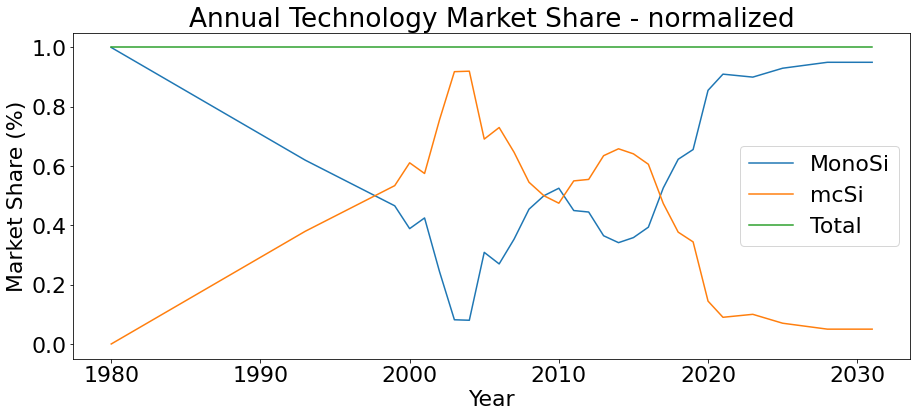

In [51]:
#normalize all marketshares each year to make sure everything adds to 100%
est_mrktshrs['Scale'] = 1/est_mrktshrs['Total']
est_mrktshrs['monoSi_scaled']= est_mrktshrs['Scale']*est_mrktshrs['monoSi']
est_mrktshrs['mcSi_scaled']= est_mrktshrs['Scale']*est_mrktshrs['mcSi']

scaled_marketshares = est_mrktshrs[['monoSi_scaled','mcSi_scaled']]
scaled_marketshares.columns = ['monoSi','mcSi']
scaled_marketshares.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_scaledmrktshr_mcSi_mono.csv', index=True)
scaled_marketshares['Total'] = scaled_marketshares['monoSi']+scaled_marketshares['mcSi']
#print(scaled_marketshares)
plt.plot(scaled_marketshares['monoSi'],label='MonoSi')
plt.plot(scaled_marketshares['mcSi'],label='mcSi')
plt.plot(scaled_marketshares['Total'],label='Total')
plt.legend()
plt.title('Annual Technology Market Share - normalized')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')

Combining Cell Size shares and Market Share Data
----------
Now we have separate mono and mcSi dataframes, which contain the average cell size, based on the market share of the cell size bin as enumerated in ITRPV 2020. The next step is to combine these technology specific (mono vs mc) based on the module technology market share.

Text(0, 0.5, 'Average cell dimension (mm)')

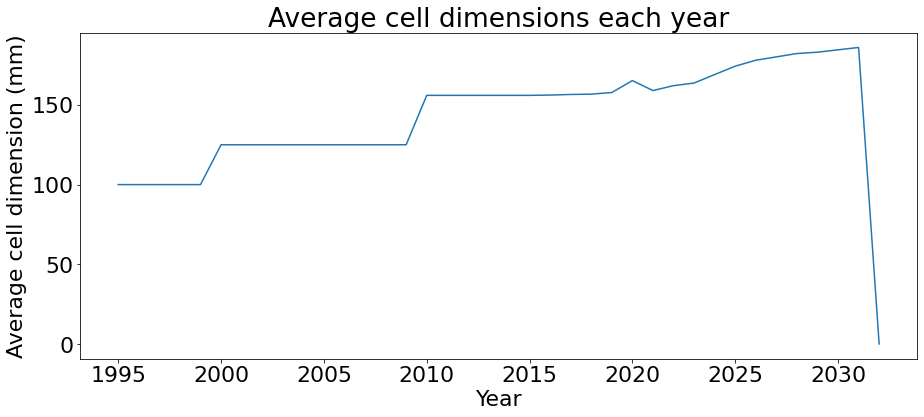

In [54]:
#now combine technology market share of mcSi and monoSi with their respective average cell dimensions
#which have already been cell size marketshare weighted
#going to ignore "otherSi" because for the most part less than 2%, except 2002

#trim the techmarketshare data to 1995 through latest prediction
est_mrktshrs_sub = scaled_marketshares.loc[est_mrktshrs.index>=1995] #could also use a filter function instead

#multiply the share of each tech by the weighted average cell size
mrkt_wtd_cells = est_mrktshrs_sub.mul(df_avgcell,'columns')
#sum across monoSi and mcSi for the total market average cell size (x and y)
market_average_cell_dims = pd.DataFrame(mrkt_wtd_cells.agg("sum", axis="columns"))
market_average_cell_dims.columns = ['avg_cell']

#print(market_average_cell_dims)
plt.plot(market_average_cell_dims, label='annual average cell dimensions in mm')
#plt.legend()
plt.title('Average cell dimensions each year')
plt.xlabel('Year')
plt.ylabel('Average cell dimension (mm)')

Area of a cell
-------
The above weighted averages are 1 axis dimension of the square cells in a module. Here we create a dataframe of the averge area of a cell for each year.

In [61]:
df_cellarea_mm2 = market_average_cell_dims.pow(2,axis='columns') #still in mm^2/cell
#you cannot multiply the df.columnname by itself and get a dataframe back, but df.pow returns a dataframe
df_cellarea_mm2.columns = ['avg_cell']
df_cellarea_m2 = df_cellarea_mm2*0.000001 #mm^2 to m^2
df_cellarea_cm2 = df_cellarea_mm2*0.01 #mm^2 to cm^2
#print(df_cellarea_m2)

## Calculate cells/m^2 

While there is technology information of # of cells per module (ex: 60, 72), we are looking for the amount of silicon per m^2 of module. Therefore, it will be easier to figure out how many cells at their respective sizes fit into a m^2 rather than scaling up to the module, only to divide by module size. Additionally, the analysis excludes any spacing efficiency factor (i.e. how close the cells are together), as this type of information is not readily available. Therefore, the assumption is the cells are placed close together, leaving no space, which should slightly overestimate the silicon per m^2.

This # cells/ m^2 of module will be used as a factor in the final calculation of g Si/m^2 module.

In [62]:
# calculate # cells/m^2 at this point, rather than using the # cells per module factor
df_cellperm2 = 1/df_cellarea_m2
#print(df_cellperm2)
df_cellperm2.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_cell_per_m2.csv', index=True)

g of Si per cell
---------
In addition to the number of cells that fit into 1m^2 of module, we need the weight of silicon per cell. First, the weighted average of wafer thickness was calculated for each year based on wafer trends and module type market share in the CE Data google spreadsheet. This data is read in here.

In [63]:
#read in a csv that was copied from CE Data google sheet where the marketshare weighting was done
cwd = os.getcwd() #grabs current working directory
wafer_thickness = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/Wafer_thickness.csv",
                              index_col='Year', usecols=lambda x: x not in skipcols)
#this file path navigates from current working directory back up 2 folders, and over to the csv
#convert micron to cm
wafer_thick_cm = wafer_thickness/10000 # microns in a cm
#print(wafer_thick_cm)

Text(0.5, 1.0, 'Wafer Thickness (cm)')

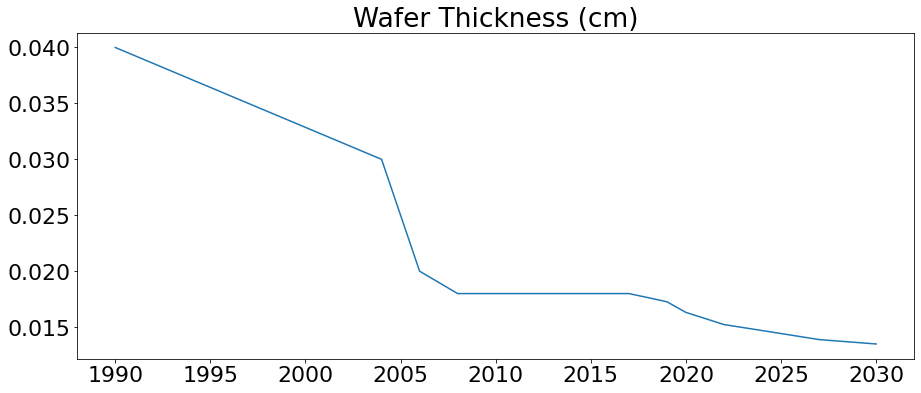

In [64]:
#There are missing data, so we will interpolate linearly for missing years
wafer_thick_cm = wafer_thick_cm.interpolate(method='linear',axis=0)
#print(wafer_thick_cm)
plt.plot(wafer_thick_cm, label='Wafer Thickness (cm)')
plt.title('Wafer Thickness (cm)')

Now multiply the thickness of the cell by the area of the cell to get a cell volume for each year

In [65]:
#First, remove 1990 through 1994, to match the size of the cell area df
wafer_thick_cm_1995 = wafer_thick_cm.loc[wafer_thick_cm.index>=1995]
#rename the columns for df.mul operation
wafer_thick_cm_1995.columns = ['avg_cell']
df_cell_volume = df_cellarea_cm2.mul(wafer_thick_cm_1995,'columns')
df_cell_volume.columns = ['cell_volume_cm3']
#print(df_cell_volume)
#plt.plot(df_cell_volume, label='average cell volume (cm^3)')
#plt.legend()

Now we have the volume of the cell in cm^3 for each year, we can bring in the density of Silicon to get a mass of Silicon per cell for each year.

      Si_gpercell
Year             
1995     8.484214
1996     8.317857
1997     8.151500
1998     7.985143
1999     7.818786
2000    11.956920
2001    11.696987
2002    11.437054
2003    11.177121
2004    10.917188
2005     9.097656
2006     7.278125
2007     6.914219
2008     6.550313
2009     6.550313
2010    10.202138
2011    10.202138
2012    10.202138
2013    10.202138
2014    10.202138
2015    10.202138
2016    10.225484
2017    10.275739
2018    10.094425
2019    10.009689
2020    10.379519
2021     9.290637
2022     9.318439
2023     9.342366
2024     9.781205
2025    10.207632
2026    10.452278
2027    10.496391
2028    10.642148
2029    10.637608
2030    10.706457
2031          NaN
2032          NaN


Text(0, 0.5, 'Silicon (grams/cell)')

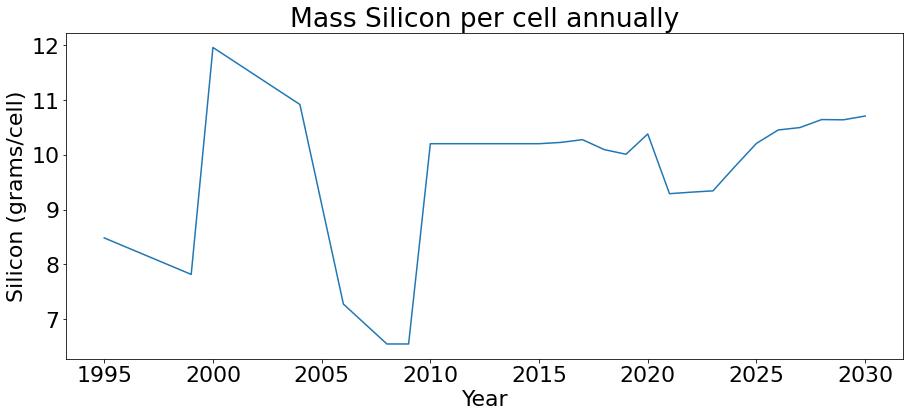

In [68]:
df_Simass_percell = df_cell_volume.mul(density_si)
df_Simass_percell.columns = ['Si_gpercell']
print(df_Simass_percell)
df_Simass_percell.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_si_g_per_cell.csv', index=True)
plt.plot(df_Simass_percell, label='Mass Si per cell (g/cell)')
#plt.legend()
plt.title('Mass Silicon per cell annually')
plt.xlabel('Year')
plt.ylabel('Silicon (grams/cell)')

## g Si per m^2 of module

Now take the above mass of silicon per cell and multiply it by the factor of number of cells per m^2 of module

Text(0, 0.5, 'Silicon (grams/m^2)')

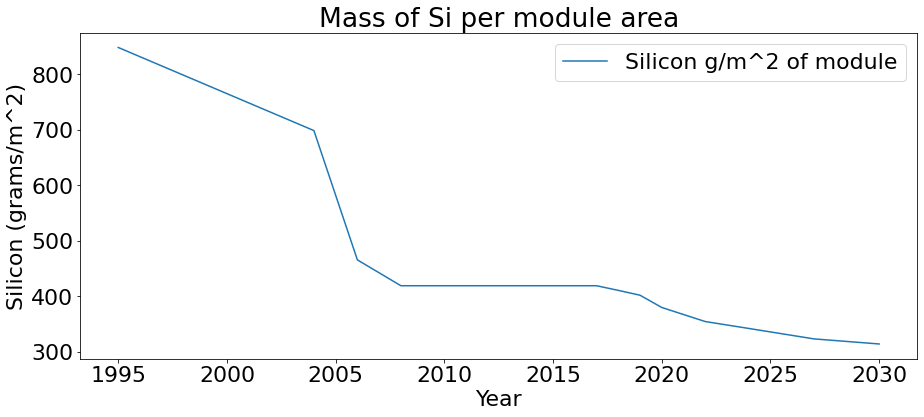

In [71]:
df_Simass_percell.columns = df_cellperm2.columns = ['Si_g'] #rename to a common name
df_Simass_perm2 = df_Simass_percell.mul(df_cellperm2, 'columns') #multiply
#print(df_Simass_perm2)
#print out to a csv
df_Simass_perm2.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_si_g_per_m2.csv', index=True)

#make a pretty plot
plt.plot(df_Simass_perm2, label='Silicon g/m^2 of module')
plt.legend()
plt.title('Mass of Si per module area')
plt.xlabel('Year')
plt.ylabel('Silicon (grams/m^2)')

For post-2030, the mass per m^2 of silicon was held constant through 2050 due to the uncertainty about future technology trends. For example, there are at least 3 different cell sizes which are vying for becoming the next mainstream technology, the move to all bifiacial might affect silicon use differently, and the half-cut and smaller cell technologies will also have an affect. Therefore, we have held it constant from 2030 onward, and this assumption can be modified by the user.

Text(0.5, 0, 'Year')

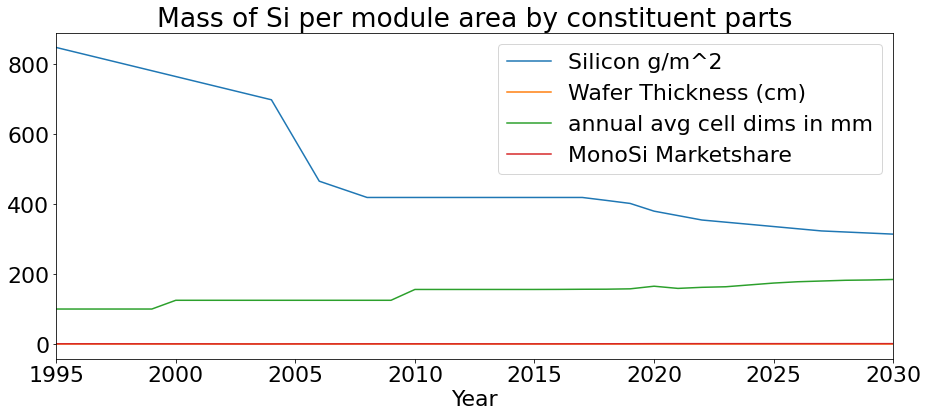

In [72]:
#understanding what influences the changes in Si mass/module m^2
plt.plot(df_Simass_perm2, label='Silicon g/m^2')
plt.plot(wafer_thick_cm, label='Wafer Thickness (cm)')
plt.plot(market_average_cell_dims, label='annual avg cell dims in mm')
plt.plot(scaled_marketshares['monoSi'],label='MonoSi Marketshare')

plt.legend()
plt.title('Mass of Si per module area by constituent parts')
plt.xlim([1995,2030])
plt.xlabel('Year')

# Bifacial Trend - 50% by 2030

Along with glass-glass packaging and reduced aluminum framing for bifacial modules, the silicon cell requirements for bifaciality differ from standard mono-Si monofacial cells. First, we'll calculate silicon mass per m^2 for bifacial modules, then we will market share weight this with other silicon cell technology, such that bifacial is 50% of the cell/module market by 2030, then hold constant through 2050.